In [1]:
import os

os.chdir('C:/Users/EunJin/Desktop/논문 데이터')
os.getcwd()

'C:\\Users\\EunJin\\Desktop\\논문 데이터'

In [2]:
import pandas as pd

car_df1_cluster1 = pd.read_pickle('car_df1_cluster1.pkl')

In [3]:
len(car_df1_cluster1)

611122

In [4]:
car_df1_cluster1['link_id'].nunique()

131

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_df1_cluster1.drop(['date','road_name','link_id','start_point','end_point','cluster','y'],axis = 1), car_df1_cluster1['y'], test_size=0.3, random_state=333)

In [4]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [5]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred) : 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_cv_test(model, train_X, train_y, test_X, test_y, is_log) :

    train_rmse = []
    valid_rmse = []
    
    print('##### {} #####'.format(model.__class__.__name__))
        
    for i, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        X_train, X_val = train_X.iloc[train_idx, :], train_X.iloc[val_idx, :]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        model.fit(X_train, y_train)
        
        if is_log :
            y_train = np.expm1(y_train)
            y_val = np.expm1(y_val)
            pred_train = np.expm1(model.predict(X_train))
            pred_valid = np.expm1(model.predict(X_val))
        else :
            pred_train = model.predict(X_train)
            pred_valid = model.predict(X_val)

        print('{0} fold train rmse : {1:.3f} valid rmse : {2:.3f}'.format(i, rmse(y_train, pred_train), rmse(y_val, pred_valid)))
        
        train_rmse.append(rmse(y_train, pred_train))
        valid_rmse.append(rmse(y_val, pred_valid))

    print('\n')    
    print('mean train rmse : {0:.3f} mean valid rmse : {1:.3f}'.format(np.mean(train_rmse), np.mean(valid_rmse)))

    
    model.fit(train_X, train_y)
    
    if is_log :
        test_y = np.expm1(test_y)
        pred_test = np.expm1(model.predict(test_X))
    else :
        pred_test = model.predict(test_X)
    
    print('test rmse {0:.3f} '.format(rmse(test_y, pred_test)))
    
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, random_state = 333)

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [8]:
model_cv_test(lr, X_train, y_train, X_test, y_test, False)

##### LinearRegression #####
0 fold train rmse : 6.060 valid rmse : 6.073
1 fold train rmse : 6.067 valid rmse : 6.060
2 fold train rmse : 6.065 valid rmse : 6.062


mean train rmse : 6.064 mean valid rmse : 6.065
test rmse 6.065 


In [9]:
ridge = Ridge()
model_cv_test(ridge, X_train_sc, y_train, X_test_sc, y_test, False)

##### Ridge #####
0 fold train rmse : 6.062 valid rmse : 6.074
1 fold train rmse : 6.068 valid rmse : 6.061
2 fold train rmse : 6.067 valid rmse : 6.064


mean train rmse : 6.066 mean valid rmse : 6.067
test rmse 6.066 


In [10]:
lasso = Lasso()
model_cv_test(lasso, X_train_sc, y_train, X_test_sc, y_test, False)

##### Lasso #####
0 fold train rmse : 6.724 valid rmse : 6.727
1 fold train rmse : 6.726 valid rmse : 6.719
2 fold train rmse : 6.723 valid rmse : 6.727


mean train rmse : 6.724 mean valid rmse : 6.724
test rmse 6.722 


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)
#model_cv_test(rf, X_train, y_train, X_test, y_test, False)

In [12]:
model_cv_test(rf, X_train_sc, y_train, X_test_sc, y_test, False)

##### RandomForestRegressor #####


C:\Users\EunJin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0 fold train rmse : 1.005 valid rmse : 2.381
1 fold train rmse : 1.003 valid rmse : 2.353
2 fold train rmse : 1.003 valid rmse : 2.375


mean train rmse : 1.004 mean valid rmse : 2.369
test rmse 2.288 


In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [15]:
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [16]:
model_cv_test(xgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### XGBRegressor #####
0 fold train rmse : 4.457 valid rmse : 4.463
1 fold train rmse : 4.500 valid rmse : 4.508
2 fold train rmse : 4.526 valid rmse : 4.517


mean train rmse : 4.494 mean valid rmse : 4.496
test rmse 4.495 


In [17]:
model_cv_test(lgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### LGBMRegressor #####
0 fold train rmse : 3.063 valid rmse : 3.077
1 fold train rmse : 3.069 valid rmse : 3.081
2 fold train rmse : 3.029 valid rmse : 3.043


mean train rmse : 3.054 mean valid rmse : 3.067
test rmse 3.069 


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

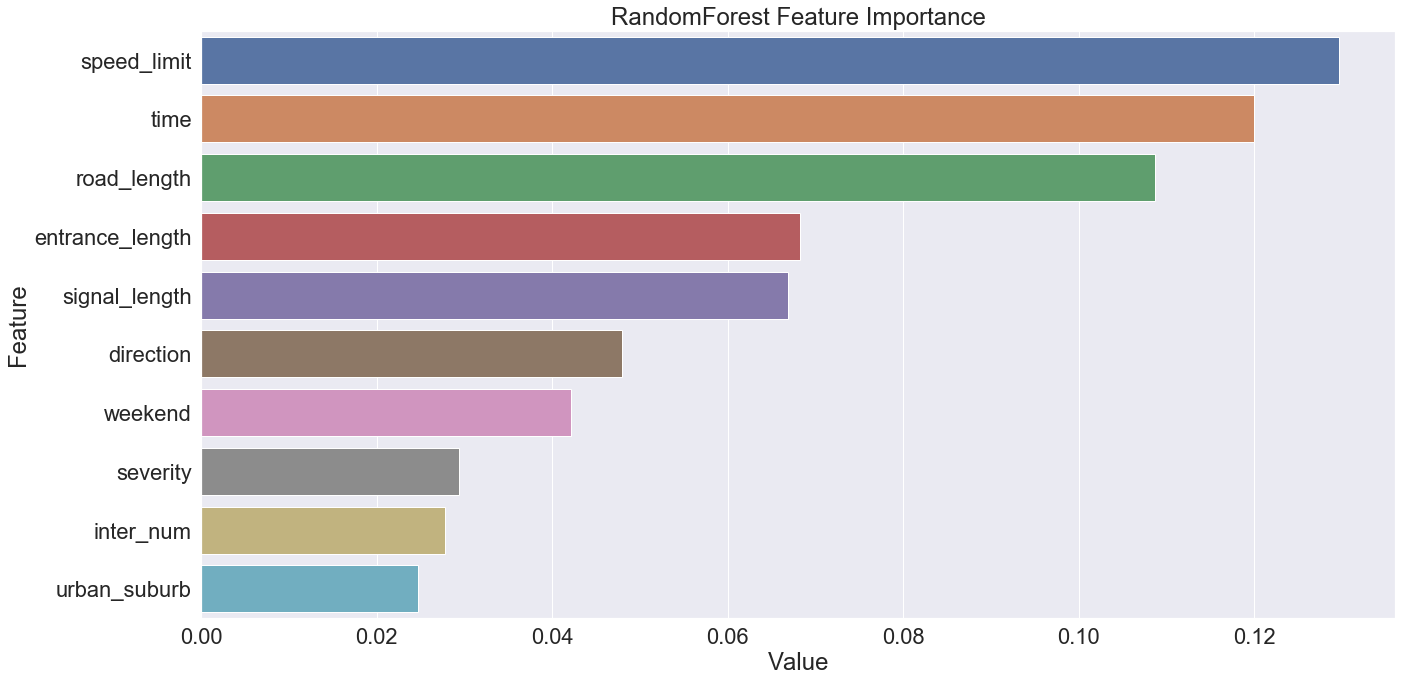

In [19]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X_train.columns)), columns=['Value','Feature'])

sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:10])
plt.title('RandomForest Feature Importance')
plt.tight_layout()
plt.show()

## cluster1은 rmse 기준으로 randomForest 선택

In [22]:
car_df1_cluster1.link_id.nunique()

131